# Question 5


## part A

Here we are supposed to find the maxima of the intensity, which will be given the derivative of the intenasity equated to 0, the intensity can be written as:
$$I=\alpha\frac{\lambda^{-5}}{e^{\frac{\beta}{\lambda}}-1}$$
where $\alpha=2\pi hc^2$, and $\beta=\frac{hc}{k_BT}$

Now, after differntiation we have:
$$\frac{dI}{d\lambda}=\frac{(e^\frac{\beta}{\lambda}-1)(\frac{-5}{\lambda^6})-\lambda^{-5}e^\frac{\beta}{\lambda}(\frac{-\beta}{\lambda^2})}{(e^\frac{\beta}{\lambda}-1)^2}$$

Equating it with 0, we multiply the RHS with $\lambda^6(e^\frac{\beta}{\lambda}-1)^2$, to obtain:

$$-5(e^\frac{\beta}{\lambda}-1)+\frac{\beta}{\lambda} e^\frac{\beta}{\lambda}=0$$
writing $\frac{\beta}{\lambda}=x$, we have the equation as:
$$x=5(1-e^{-x})$$

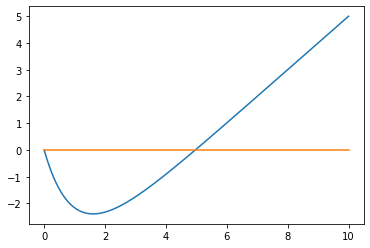

In [1]:
#plotting to see the behaviour

import numpy as np
import math
import matplotlib.pyplot as plt

x=np.linspace(0,10,1000)
L=np.zeros(len(x))

for i in range(len(x)):
    L[i]=x[i]-5*(1-math.exp(-x[i]))

plt.plot(x,L)
plt.plot(x,np.zeros(len(x)))

In [ ]:
 #Thus we suspect that there is a root near x=4.7, we try to find it by bisection method.

def f(y):
     return 5*(1-math.exp(-y))-y

def bisection(f, left, right, tol):
    fL=f(left)
    fR=f(right)
    p=None
    while(right-left>tol):
        fM=f((left+right)/2)
        if(fL*fR>0):
            p=999999
            break
        elif(fL*fM>0):
            left=(left+right)/2
            fL=fM
            p=left
        elif(fL*fM<0):
            right=(left+right)/2
            fR=fM
            p=right
        elif(fL*fM==0):
            left=(left+right)/2
            right=(left+right)/2
            p=left
    return p


print(bisection(f,4.9,5,1e-6))
#print(f(4.5),f(5))

4.965114593505859


We now, have the solution as x=4.96511459 which means, Now, $\frac{\beta}{\lambda}=x \implies \lambda = \frac{\beta}{x}= \frac{\frac{hc}{k_Bx}}{T}$,

This means the displacement constant is $b=\frac{hc}{k_Bx}$
Putting the values we write a code to calculate the value of the displacement constant.

In [ ]:
h=6.626e-34
c=3e8
k_B=1.380649e-23
b=(h*c)/(k_B*bisection(f, 4.5, 5, 1e-6))
print('Displacement constant is:', b)

Displacement constant is: 0.0028997476867966784


In [ ]:
#this matches with theoretical value. Now, we calculate the temperature of the sun.

def temp(wave_l):
    return b/wave_l

wave_l=502e-9

print('Temperature in kelvin is:', temp(wave_l))

Temperature in kelvin is: 5776.389814336012
